In [1]:
import dill
import torch
import matplotlib.pyplot as plt
from src.PointwiseNet import PointwiseFNN
from src.GridbasedNet import GridbasedFNN
from torch.utils.data import DataLoader

def Savepickle(obj, doc_path):
  with open(doc_path, 'wb') as file:
         dill.dump(obj, file)     

def Readpickle(doc_path):
    with open(doc_path, 'rb') as file:
        return dill.load(file)

# European Call 
## Point-wise Learning

### Data Loader

In [3]:
# Read data
data_saved = Readpickle('./data/European/point_wise_training_data88w.pkl')
paras = data_saved['paras']
dataset = data_saved['dataset']
train, validate, test = data_saved['train'], data_saved['validate'], data_saved['test']
loader = { 'train' : DataLoader(train, batch_size=2048, shuffle=True),
           'validate': DataLoader(validate, batch_size=2048, shuffle=True),
           'test'  : DataLoader(test,  batch_size=2048, shuffle=True) }

Sigma , Lambda = data_saved['x_norm_mat']

### Network Training

In [5]:
# Train the model
point_wise_IV_approximator = PointwiseFNN(loader)
point_wise_IV_approximator.Train(num_epochs=200, learning_rate=0.01, lr_step_size=10, min_lr =5e-4, abs_tolerance=0.001)
point_wise_IV_approximator.Test(loader['test'])

------------------------------------------------------- 
-------------------- Epoch [1/200] -------------------- 
Epoch [1/200], Step [1/258], Loss: 170.1330
Epoch [1/200], Step [52/258], Loss: 3.8737
Epoch [1/200], Step [104/258], Loss: 2.2190
Epoch [1/200], Step [156/258], Loss: 1.4103
Epoch [1/200], Step [208/258], Loss: 0.9827
Epoch [1/200], Avg. Train Loss: 4.0312, Avg. Validate Loss: 0.8968
------------------------------------------------------- 
-------------------- Epoch [2/200] -------------------- 
Epoch [2/200], Step [1/258], Loss: 0.9284
Epoch [2/200], Step [52/258], Loss: 0.8027
Epoch [2/200], Step [104/258], Loss: 0.7571
Epoch [2/200], Step [156/258], Loss: 0.6689
Epoch [2/200], Step [208/258], Loss: 0.7976
Epoch [2/200], Avg. Train Loss: 0.7554, Avg. Validate Loss: 0.6149
------------------------------------------------------- 
-------------------- Epoch [3/200] -------------------- 
Epoch [3/200], Step [1/258], Loss: 0.5484
Epoch [3/200], Step [52/258], Loss: 0.6429
Epo

(1.6644264317371628e-05, 0.034062680463458214)

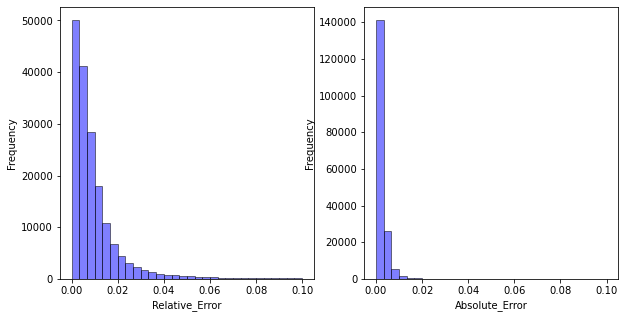

In [6]:
# Reletive error on test
point_wise_IV_approximator.eval()
with torch.no_grad():
    y_predict = point_wise_IV_approximator(test[:][0])
    y_label = test[:][1]
    relative_error = torch.abs((y_label - y_predict)/y_label).flatten().numpy() 
    absolute_error = torch.abs((y_label - y_predict)).flatten().numpy()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(relative_error, bins=30, range=(0, 0.1), alpha=0.5, color='blue', edgecolor='black')
plt.xlabel('Relative_Error')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(absolute_error, bins=30, range=(0, 0.1), alpha=0.5, color='blue', edgecolor='black')
plt.xlabel('Absolute_Error')
plt.ylabel('Frequency')

plt.show()

In [7]:
# Save the model
result_saved = {
    'state_dict' : point_wise_IV_approximator.state_dict(),
    'train_loss' : point_wise_IV_approximator.train_loss,
    'validate_loss' : point_wise_IV_approximator.validate_loss
}

# Savepickle(result_saved, './data/European/point_wise_training_result88w.pkl')

In [8]:
# Read the model
result_saved = Readpickle('./data/European/point_wise_training_result88w.pkl')
point_wise_IV_approximator = PointwiseFNN(loader)
point_wise_IV_approximator.load_state_dict(result_saved['state_dict'])
point_wise_IV_approximator.train_loss = result_saved['train_loss']
point_wise_IV_approximator.validate_loss = result_saved['validate_loss']
point_wise_IV_approximator.Test(loader['test'])

Test set: Avg. Sample Loss: 0.0000, Avg. Batch Loss: 0.0341


(1.6644264465536583e-05, 0.034062680766679516)

## Grid-based Learning

### Data loader

In [9]:
# Read data
data_saved = Readpickle('./data/European/grid_based_training_data1w.pkl')
paras = data_saved['paras']
dataset = data_saved['dataset']
train, validate, test = data_saved['train'], data_saved['validate'], data_saved['test']
loader = { 'train' : DataLoader(train, batch_size=32, shuffle=True),
           'validate': DataLoader(validate, batch_size=32, shuffle=True),
           'test'  : DataLoader(test,  batch_size=32, shuffle=True) }
recover_y_dim = data_saved['recover_y_dim'] # 88
Sigma , Lambda = data_saved['x_norm_mat']

### Network training

In [10]:
# Train the model
grid_based_IV_approximator = GridbasedFNN(loader)
grid_based_IV_approximator.Train(num_epochs=5000, learning_rate=0.001, lr_step_size=100, min_lr =5e-4, abs_tolerance=0.001)
grid_based_IV_approximator.Test(loader['test'])

------------------------------------------------------- 
-------------------- Epoch [1/5000] -------------------- 
Epoch [1/5000], Step [1/188], Loss: 178.2651
Epoch [1/5000], Step [38/188], Loss: 59.1929
Epoch [1/5000], Step [76/188], Loss: 4.9951
Epoch [1/5000], Step [114/188], Loss: 7.6808
Epoch [1/5000], Step [152/188], Loss: 3.2167
Epoch [1/5000], Avg. Train Loss: 34.0436, Avg. Validate Loss: 4.1931
------------------------------------------------------- 
-------------------- Epoch [2/5000] -------------------- 
Epoch [2/5000], Step [1/188], Loss: 3.5857
Epoch [2/5000], Step [38/188], Loss: 3.4799
Epoch [2/5000], Step [76/188], Loss: 3.7881
Epoch [2/5000], Step [114/188], Loss: 2.8871
Epoch [2/5000], Step [152/188], Loss: 3.8289
Epoch [2/5000], Avg. Train Loss: 3.8971, Avg. Validate Loss: 3.5477
------------------------------------------------------- 
-------------------- Epoch [3/5000] -------------------- 
Epoch [3/5000], Step [1/188], Loss: 3.0506
Epoch [3/5000], Step [38/188],

(0.000828776525799185, 0.026310365898386825)

In [12]:
grid_based_IV_approximator.eval()
with torch.no_grad():
    y_predict = grid_based_IV_approximator(test[:][0])
    y_label = test[:][1]
    relative_error = torch.abs((y_label - y_predict)/y_label) # .numpy().reshape(recover_y_dim)
    relative_error_max = relative_error.max(dim=0)[0].numpy().reshape(recover_y_dim)
    relative_error_mean = relative_error.mean(dim=0).numpy().reshape(recover_y_dim)
    relative_error_median = relative_error.median(dim=0)[0].numpy().reshape(recover_y_dim)
    
    abs_error = torch.abs((y_label - y_predict)) # .numpy().reshape(recover_y_dim)
    abs_error_max = abs_error.max(dim=0)[0].numpy().reshape(recover_y_dim)
    abs_error_mean = abs_error.mean(dim=0).numpy().reshape(recover_y_dim)
    abs_error_median = abs_error.median(dim=0)[0].numpy().reshape(recover_y_dim)

In [16]:
# Save the model
result_saved = {
    'state_dict' : grid_based_IV_approximator.state_dict(),
    'train_loss' : grid_based_IV_approximator.train_loss,
    'validate_loss' : grid_based_IV_approximator.validate_loss
}

#Savepickle(result_saved, './data/European/grid_based_training_result1w.pkl')

In [17]:
# Read the model
result_saved = Readpickle('./data/European/grid_based_training_result1w.pkl')
grid_based_IV_approximator = GridbasedFNN(loader)
grid_based_IV_approximator.load_state_dict(result_saved['state_dict'])
grid_based_IV_approximator.train_loss = result_saved['train_loss']
grid_based_IV_approximator.validate_loss = result_saved['validate_loss']
grid_based_IV_approximator.Test(loader['test'])

Test set: Avg. Sample Loss: 0.0008, Avg. Batch Loss: 0.0263


(0.0008287765374407172, 0.026310366267959278)